In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# The data to be fit
m = 20
theta_true = 0.5
x = np.linspace(-1,1,m)
y = theta_true * x

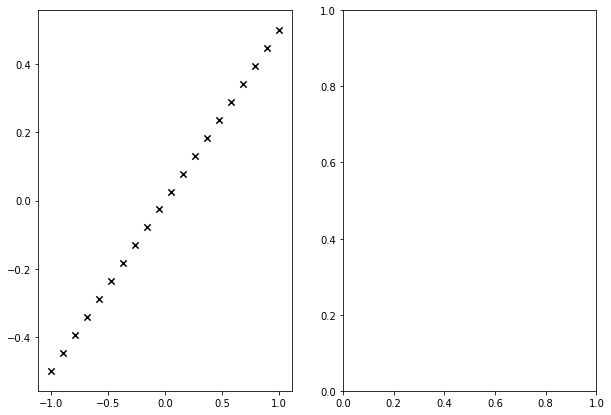

In [53]:
# LHS is the data, RHS is the cost function
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
ax[0].scatter(x, y, marker='x', s=40, color='k')

## Intuition behind Gradient Descent

In the gradient descent method of optimization, a hypothesis function, $h_\boldsymbol{\theta}(x)$ is fitted to a data set, $(x^{(i)}, y^{(i)})$ (i = 1, 2,...,m) by minimizing an associated cost function, $J(\boldsymbol{\theta})$.

### Cost function
The appropriate cost function might be the sum of the squared difference between the data and the hypothesis.

$J(\boldsymbol{\theta}) = \frac{1}{2m} \sum_i^{m} \left[h_\theta(x^{(i)}) - y^{(i)}\right]^2$

In [54]:
def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit"""
    
    # checks if the array is 2D
    theta1 = np.atleast_2d(np.asarray(theta1))
    
    # calculates the  
    return np.average((hypothesis(x, theta1) - y)**2, axis=1)/2

### Hypothesis

$h_\boldsymbol{\theta}(x) = \theta_0 + \theta_1 x$

In [55]:
def hypothesis(x, theta1):
    """Our 'hypothesis function', a straight line through the origin"""
    return theta1*x

In [56]:
# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

### Updation of Theta

$$\theta_j \rightarrow \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\boldsymbol{\theta})$$

In [57]:
# Take N steps with learning_rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5 # No. of steps
alpha = 1 # learning_rate
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum(
                                    (hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

In [58]:
theta1

[0,
 0.1842105263157895,
 0.30055401662049863,
 0.3740341157603149,
 0.42044259942756734]

In [59]:
# Annotate the cost function plot with coloured points indicating the 
# parameters chosen and red arrows indicating the steps down the gradient
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, theta1[0]), color=colors[0], lw=2,
          label=r'$\theta_1 = (:.3f)$'.format(theta1[0]))
for j in range(1,N):
    ax[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, theta1[j]), color=colors[j], lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

In [68]:
# Labels, titles and a legend
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
ax[0].legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>